In [45]:
# Import API key
from api_keys import geoapify_key
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
import datetime
import math
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
import requests
import json

# Import API key
from api_keys import geoapify_key

In [2]:
# Reading csv file and saving it as a dataframe
csv_file_path = 'Resource/uber.csv'
uber_df = pd.read_csv(csv_file_path)

In [3]:
# Origianl data
print(len(uber_df))
uber_df.head()

200000


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
# FUNCTIONS
# Define haversine function to calculate distance between two coordinates
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the earth in km
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c  # Distance in km
    return d

# Creating a function to determine is a date is weekday or weekend
def check_weekday(day):  
    if ((day == "Monday") | (day == "Tuesday") | (day == "Wednesday") | (day == "Thursday")):
        d = "Weekday"
    else:
        d = "Weekend"
    return d 

In [5]:
# Cleaning useless data
uber_df_filtered = uber_df.loc[((uber_df["pickup_latitude"] > 20) &
                               (uber_df["pickup_longitude"] < -60))]

# Calculating distance between 2 coordinates
uber_df_filtered['distance'] = uber_df_filtered.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], 
                                                                            row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Cleaning more useless data
uber_df_filtered = uber_df_filtered.loc[((uber_df_filtered["distance"] != 0) &
                                         (uber_df_filtered["distance"] < 50) &
                                         (uber_df_filtered["fare_amount"] < 300) &
                                         (uber_df_filtered["fare_amount"] > 0) &
                                         (uber_df_filtered["passenger_count"] <= 6))]

# ADDING COLUMNS OF INTEREST
# Adding date and year
uber_df_filtered["date"] = uber_df_filtered["key"]
uber_df_filtered["date"] = pd.to_datetime(uber_df_filtered['date']).dt.date
uber_df_filtered["year"] = pd.to_datetime(uber_df_filtered['date']).dt.year
uber_df_filtered['date'] = pd.to_datetime(uber_df_filtered['date']) # Converting date to datetime type
uber_df_filtered['key'] = pd.to_datetime(uber_df_filtered['key']) # Converting date to datetime type
# Adding month
uber_df_filtered["month"] = uber_df_filtered["date"]
uber_df_filtered["month"] = pd.to_datetime(uber_df_filtered['date']).dt.month 
# Adding season
uber_df_filtered["season"] = ""
uber_df_filtered.loc[(uber_df_filtered["month"] == 12) | (uber_df_filtered["month"] == 1) | (uber_df_filtered["month"] == 2), "season"] = "Winter"
uber_df_filtered.loc[(uber_df_filtered["month"] == 3) | (uber_df_filtered["month"] == 4) | (uber_df_filtered["month"] == 5), "season"] = "Spring"
uber_df_filtered.loc[(uber_df_filtered["month"] == 6) | (uber_df_filtered["month"] == 7) | (uber_df_filtered["month"] == 8), "season"] = "Summer"
uber_df_filtered.loc[(uber_df_filtered["month"] == 9) | (uber_df_filtered["month"] == 10) | (uber_df_filtered["month"] == 11), "season"] = "Autumn"
# Adding day
uber_df_filtered['Day'] = uber_df_filtered["date"].dt.day_name()
# Adding type of day
uber_df_filtered['Type of day'] = uber_df_filtered.apply(lambda row: check_weekday(row['Day']), axis=1)
# Adding time
uber_df_filtered['Time'] = uber_df_filtered["key"].dt.time

# Printing
print(len(uber_df_filtered))
uber_df_filtered.head()

C:\Users\oscar\AppData\Local\Temp\ipykernel_13864\3065948633.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_df_filtered['distance'] = uber_df_filtered.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'],


193735


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,date,year,month,season,Day,Type of day,Time
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015-05-07,2015,5,Spring,Thursday,Weekday,19:52:06
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009-07-17,2009,7,Summer,Friday,Weekend,20:04:56
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009-08-24,2009,8,Summer,Monday,Weekday,21:45:00
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009-06-26,2009,6,Summer,Friday,Weekend,08:22:21
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014-08-28,2014,8,Summer,Thursday,Weekday,17:47:00


In [6]:
# Determine outliers for Winter
price = uber_df_filtered.loc[uber_df_filtered["season"] == "Winter", "fare_amount"]
quartiles = price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_winter = price.loc[(price < lower_bound) | (price > upper_bound)]
print(f"Winter potencial outliers: {len(outliers_winter)}.")
outliers_winter_df = uber_df_filtered.loc[outliers_winter.index,:]

# Determine outliers for Summer
price = uber_df_filtered.loc[uber_df_filtered["season"] == "Summer", "fare_amount"]
quartiles = price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_summer = price.loc[(price < lower_bound) | (price > upper_bound)]
print(f"Summer potencial outliers: {len(outliers_summer)}.")
outliers_summer_df = uber_df_filtered.loc[outliers_summer.index,:]

# Determine outliers for Authum
price = uber_df_filtered.loc[uber_df_filtered["season"] == "Autumn", "fare_amount"]
quartiles = price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_autumn = price.loc[(price < lower_bound) | (price > upper_bound)]
print(f"Authum potencial outliers: {len(outliers_autumn)}.")
outliers_autumn_df = uber_df_filtered.loc[outliers_autumn.index,:]

# Determine outliers for Spring
price = uber_df_filtered.loc[uber_df_filtered["season"] == "Spring", "fare_amount"]
quartiles = price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_spring = price.loc[(price < lower_bound) | (price > upper_bound)]
print(f"Spring potencial outliers: {len(outliers_spring)}.")
outliers_spring_df = uber_df_filtered.loc[outliers_spring.index,:]

Winter potencial outliers: 3966.
Summer potencial outliers: 3895.
Authum potencial outliers: 3926.
Spring potencial outliers: 4640.


In [43]:
# Dropping outliers
#uber_df_filtered = uber_df_filtered.drop(outliers_spring_df.index, axis=0)
#uber_df_filtered = uber_df_filtered.drop(outliers_autumn_df.index, axis=0)
#uber_df_filtered = uber_df_filtered.drop(outliers_summer_df.index, axis=0)
#uber_df_filtered = uber_df_filtered.drop(outliers_winter_df.index, axis=0)
print(len(uber_df_filtered))
uber_df_filtered.head()

177308


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,date,year,month,season,Day,Type of day,Time
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015-05-07,2015,5,Spring,Thursday,Weekday,19:52:06
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009-07-17,2009,7,Summer,Friday,Weekend,20:04:56
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009-08-24,2009,8,Summer,Monday,Weekday,21:45:00
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009-06-26,2009,6,Summer,Friday,Weekend,08:22:21
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014-08-28,2014,8,Summer,Thursday,Weekday,17:47:00


In [8]:
# Loop to populate list to plot distribution of data per season
season = ["Winter", "Spring", "Summer", "Autumn"]

# Create empty list to fill 
list_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for values in season:

    price = uber_df_filtered.loc[uber_df_filtered["season"] == values, "fare_amount"]
    
    # add subset 
    list_values.append(price)
    
    # Determine outliers using upper and lower bounds
    quartiles = price.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = price.loc[(price < lower_bound) | (price > upper_bound)]
    print(f"{values} potencial outliers: {len(outliers)}.")

Winter potencial outliers: 1138.
Spring potencial outliers: 1575.
Summer potencial outliers: 1279.
Autumn potencial outliers: 1221.


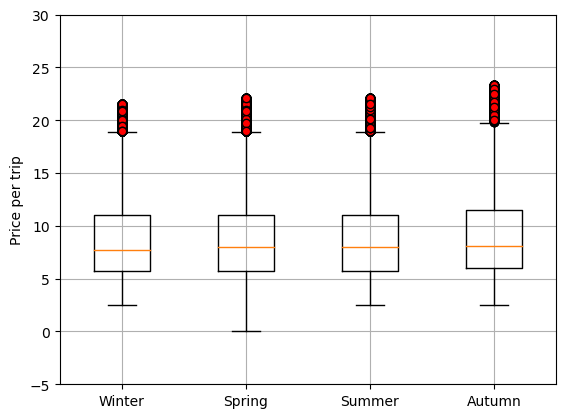

In [9]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = list_values
plt.boxplot(data, flierprops = dict(markerfacecolor = "red"))
plt.xticks([1, 2, 3, 4], ["Winter", "Spring", "Summer", "Autumn"])
plt.ylabel('Price per trip')
plt.ylim(-5,30)
plt.grid()

# Saving plot
plt.savefig("output_data/Fig1.png")

# Showing plot
plt.show()

In [10]:
# Summary of number of trips per year
total_by_year = uber_df_filtered.groupby("year")
by_year_summary = total_by_year.count()
totals = by_year_summary["date"]

# Summary of average distance of trips per year
distance_by_year = uber_df_filtered.groupby("year")
by_year_distance = distance_by_year.mean()
distance = by_year_distance["distance"]

# Summary of longest distance of a trip per year
distance_by_year = uber_df_filtered.groupby("year")
by_year_distance = distance_by_year.max()
long_distance = by_year_distance["distance"]

# Summary average number of passangers per trip per year
passangers_by_year = uber_df_filtered.groupby("year")
by_year_passangers = passangers_by_year.mean()
passangers = by_year_passangers["passenger_count"]

# Summary total of passangers per year
passangerst_by_year = uber_df_filtered.groupby("year")
by_year_passangerst = passangerst_by_year.sum()
passangerst = by_year_passangerst["passenger_count"]

# Summary of average price per trip per year
price_by_year = uber_df_filtered.groupby("year")
by_year_price = price_by_year.mean()
price = by_year_price["fare_amount"]

# Summary of the most expensive trip per year
mprice_by_year = uber_df_filtered.groupby("year")
by_year_mprice = mprice_by_year.max()
mprice = by_year_mprice["fare_amount"]

# Merging data
summary = pd.merge(totals, distance, on="year")
summary1 = pd.merge(summary, long_distance, on="year")
summary2 = pd.merge(summary1, passangers, on="year")
summary3 = pd.merge(summary2, passangerst, on="year")
summary4 = pd.merge(summary3, price, on="year")
summary5 = pd.merge(summary4, mprice, on="year")
summary5 = summary5.rename(columns={"date": "Number of trips", "distance_x": "Average Distance per trip", "distance_y": "Longest distance on a single trip",
                                    "passenger_count_x": "Average Number of passangers per trip", "passenger_count_y": "Total of passanger per year", 
                                    "fare_amount_x": "Average price per trip", "fare_amount_y": "Max price paid"})
summary5.index.names = ["Year"]
summary5_df = summary5.iloc[:, [0,4,1,3,5,2,6]]
# Printing
summary5_df

C:\Users\oscar\AppData\Local\Temp\ipykernel_13864\1557826378.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_year_distance = distance_by_year.mean()
C:\Users\oscar\AppData\Local\Temp\ipykernel_13864\1557826378.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_year_passangers = passangers_by_year.mean()
C:\Users\oscar\AppData\Local\Temp\ipykernel_13864\1557826378.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fun

,Number of trips,Total of passanger per year,Average Distance per trip,Average Number of passangers per trip,Average price per trip,Longest distance on a single trip,Max price paid
Year,,,,,,,
2009,27921,47108,2.559691,1.687189,8.336013,21.924657,23.30
2010,27222,45661,2.622329,1.677357,8.367310,27.626075,23.30
2011,28623,47432,2.606064,1.657129,8.495150,30.779263,23.30
2012,28663,47635,2.614931,1.661899,8.956136,34.849750,23.30
2013,27125,46381,2.477381,1.709899,9.662710,21.652092,23.33
2014,25851,43800,2.436524,1.694325,9.775896,20.173689,23.00
2015,11903,19914,2.353542,1.673024,9.657589,15.184929,22.04


The correlation between both factors is 0.8


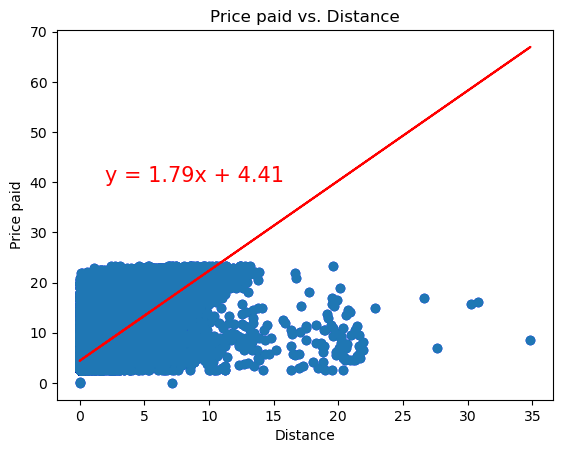

In [11]:
# Scatter plot of price paid vs. distance per trip
x_axis = uber_df_filtered["distance"]
y_axis = uber_df_filtered["fare_amount"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color="blue")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(2,40),fontsize=15,color="red")
plt.scatter(x_axis, y_axis)
plt.ylabel('Price paid')
plt.xlabel('Distance')
plt.title("Price paid vs. Distance")

correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Saving plot
plt.savefig("output_data/Fig2.png")

# Showing plot
plt.show()

The correlation between both factors is 0.0


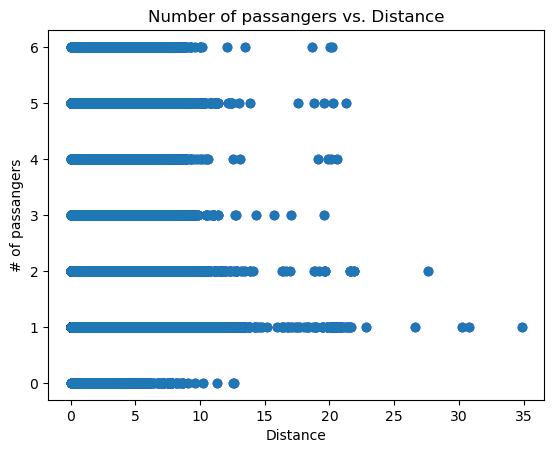

In [12]:
# Scatter plot of number of passangers vs. distance per trip
x_axis = uber_df_filtered["distance"]
y_axis = uber_df_filtered["passenger_count"]
plt.scatter(x_axis, y_axis, color="blue")
plt.scatter(x_axis, y_axis)
plt.ylabel('# of passangers')
plt.xlabel('Distance')
plt.title("Number of passangers vs. Distance")

correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Saving plot
plt.savefig("output_data/Fig11.png")

# Showing plot
plt.show()

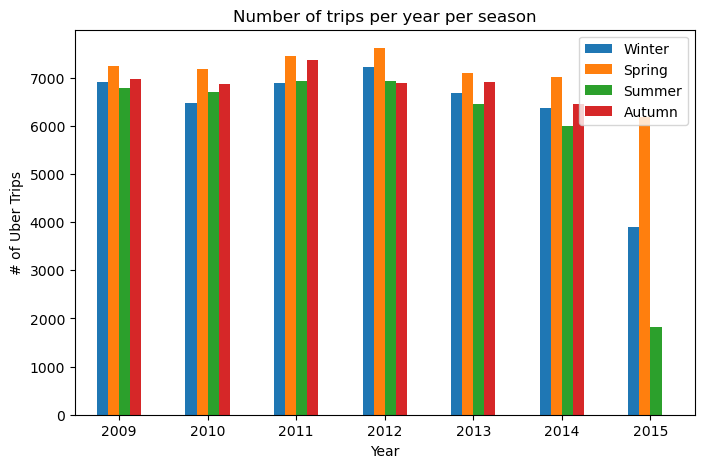

In [13]:
# Organising data to plot total of trips per season of the year
per_season = uber_df_filtered.groupby(["year", "season"]).count()
per_season = per_season.reset_index()
per_season = per_season.iloc[:,0:3].rename(columns={"Unnamed: 0": "Number of trips", "year": "Year", "season": "Season"})
per_season = per_season.set_index("Year")
autumn = per_season.iloc[[0,4,8,12,16,20],1]
spring = per_season.iloc[[1,5,9,13,17,21,24],1]
summer = per_season.iloc[[2,6,10,14,18,22,25],1]
winter = per_season.iloc[[3,7,11,15,19,23,26],1]
dictionary = {"Winter": winter, "Spring": spring, "Summer": summer, "Autumn": autumn}
season_df = pd.DataFrame(dictionary)

# Plotting
multi_plot = season_df.plot(kind="bar", figsize=(8,5))
plt.xticks(rotation="horizontal")
plt.xlabel("Year")
plt.ylabel("# of Uber Trips")
plt.title("Number of trips per year per season")

# Saving plot
plt.savefig("output_data/Fig5.png")

# Showing plot
plt.show()


C:\Users\oscar\AppData\Local\Temp\ipykernel_13864\4102908435.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  per_season = uber_df_filtered.groupby(["year", "season"]).mean()


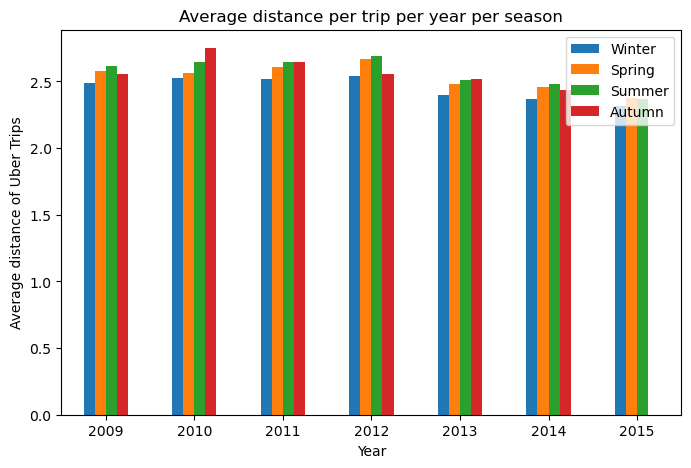

In [14]:
# Organising data to plot average distance per season of the year
per_season = uber_df_filtered.groupby(["year", "season"]).mean()
per_season = per_season.reset_index()
per_season = per_season.iloc[:,[0,1,9]].rename(columns={"distance": "Distance", "year": "Year", "season": "Season"})
per_season = per_season.set_index("Year")
autumn = per_season.iloc[[0,4,8,12,16,20],1]
spring = per_season.iloc[[1,5,9,13,17,21,24],1]
summer = per_season.iloc[[2,6,10,14,18,22,25],1]
winter = per_season.iloc[[3,7,11,15,19,23,26],1]
dictionary = {"Winter": winter, "Spring": spring, "Summer": summer, "Autumn": autumn}
season_df = pd.DataFrame(dictionary)

# Plotting
multi_plot = season_df.plot(kind="bar", figsize=(8,5))
plt.xticks(rotation="horizontal")
plt.xlabel("Year")
plt.ylabel("Average distance of Uber Trips")
plt.title("Average distance per trip per year per season")

# Saving plot
plt.savefig("output_data/Fig6.png")

# Showing plot
plt.show()

C:\Users\oscar\AppData\Local\Temp\ipykernel_13864\3469154706.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  per_season = uber_df_filtered.groupby(["year", "season"]).mean()


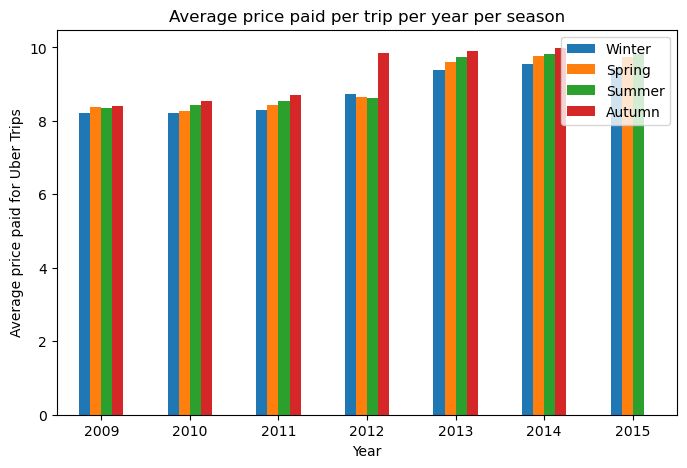

In [15]:
# Organising data to plot average price per season of the year
per_season = uber_df_filtered.groupby(["year", "season"]).mean()
per_season = per_season.reset_index()
per_season = per_season.iloc[:,[0,1,3]].rename(columns={"fare_amount": "Price", "year": "Year", "season": "Season"})
per_season = per_season.set_index("Year")
autumn = per_season.iloc[[0,4,8,12,16,20],1]
spring = per_season.iloc[[1,5,9,13,17,21,24],1]
summer = per_season.iloc[[2,6,10,14,18,22,25],1]
winter = per_season.iloc[[3,7,11,15,19,23,26],1]
dictionary = {"Winter": winter, "Spring": spring, "Summer": summer, "Autumn": autumn}
season_df = pd.DataFrame(dictionary)

# Plotting
multi_plot = season_df.plot(kind="bar", figsize=(8,5))
plt.xticks(rotation="horizontal")
plt.xlabel("Year")
plt.ylabel("Average price paid for Uber Trips")
plt.title("Average price paid per trip per year per season")

# Saving plot
plt.savefig("output_data/Fig7.png")

# Showing plot
plt.show()

C:\Users\oscar\AppData\Local\Temp\ipykernel_13864\826834544.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  per_season = uber_df_filtered.groupby(["year", "season"]).mean()


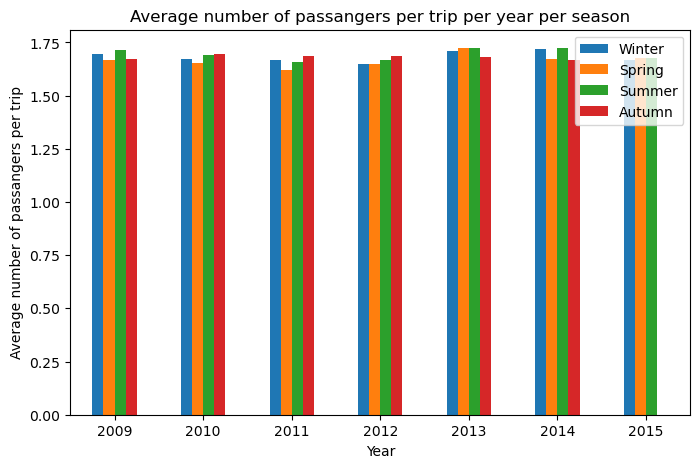

In [16]:
# Organising data to plot average number of passangers per season of the year
per_season = uber_df_filtered.groupby(["year", "season"]).mean()
per_season = per_season.reset_index()
per_season = per_season.iloc[:,[0,1,8]].rename(columns={"fare_amount": "Price", "year": "Year", "season": "Season"})
per_season = per_season.set_index("Year")
autumn = per_season.iloc[[0,4,8,12,16,20],1]
spring = per_season.iloc[[1,5,9,13,17,21,24],1]
summer = per_season.iloc[[2,6,10,14,18,22,25],1]
winter = per_season.iloc[[3,7,11,15,19,23,26],1]
dictionary = {"Winter": winter, "Spring": spring, "Summer": summer, "Autumn": autumn}
season_df = pd.DataFrame(dictionary)

# Plotting
multi_plot = season_df.plot(kind="bar", figsize=(8,5))
plt.xticks(rotation="horizontal")
plt.xlabel("Year")
plt.ylabel("Average number of passangers per trip")
plt.title("Average number of passangers per trip per year per season")

# Saving plot
plt.savefig("output_data/Fig8.png")

# Showing plot
plt.show()

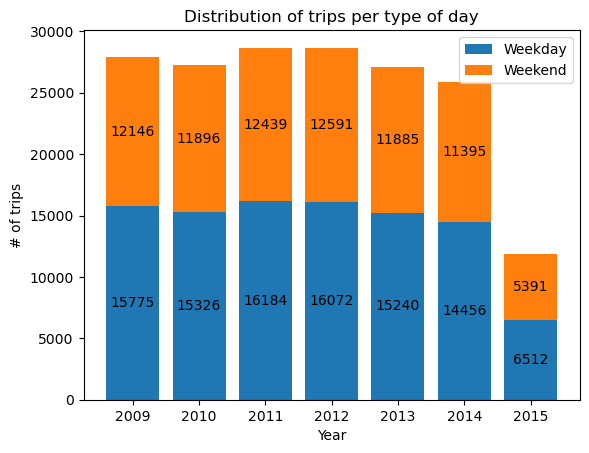

In [17]:
# Plot showing the distribution of usage of Uber on weekdays versus weekends
group = uber_df_filtered.groupby(["year", "Type of day"]).count()
day_df = pd.DataFrame(group)
day_df = day_df.iloc[:,0].reset_index().rename(columns={"fare_amount": "Average price", "year": "Year"})
year = day_df["Year"].unique()
day_df = day_df.set_index("Type of day")
y2009 = [day_df.iloc[0,1], day_df.iloc[1,1]]
y2010 = [day_df.iloc[2,1], day_df.iloc[3,1]]
y2011 = [day_df.iloc[4,1], day_df.iloc[5,1]]
y2012 = [day_df.iloc[6,1], day_df.iloc[7,1]]
y2013 = [day_df.iloc[8,1], day_df.iloc[9,1]]
y2014 = [day_df.iloc[10,1], day_df.iloc[11,1]]
y2015 = [day_df.iloc[12,1], day_df.iloc[13,1]]

# Settings for plotting
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
year = year
bar_data = {"Weekday": np.array([y2009[0], y2010[0], y2011[0], y2012[0], y2013[0], y2014[0], y2015[0]]), 
            "Weekend": np.array([y2009[1], y2010[1], y2011[1], y2012[1], y2013[1], y2014[1], y2015[1]])}
width = 0.8 
fig, ax = plt.subplots()
bottom = np.zeros(7)

for data, bar_data in bar_data.items():
    p = ax.bar(year, bar_data, width, label=data, bottom=bottom)
    bottom += bar_data

    ax.bar_label(p, label_type='center')

ax.set_title("Distribution of trips per type of day")
ax.legend()
plt.xlabel("Year")
plt.ylabel("# of trips")

# Saving plot
plt.savefig("output_data/Fig9.png")

# Showing plot
plt.show()

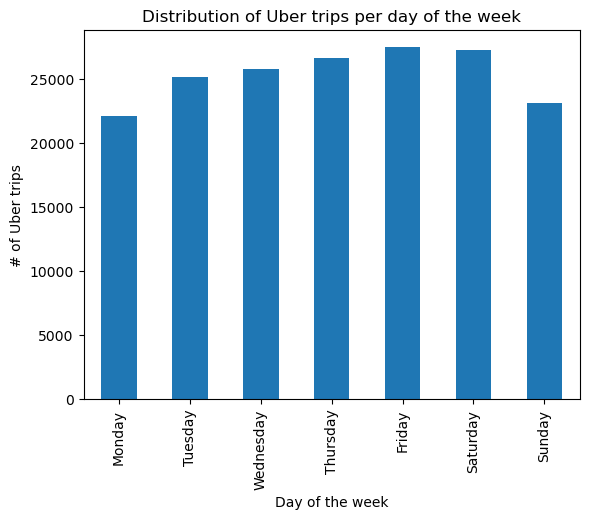

In [40]:
# Plot showing the distribution of usage of Uber each day of the week
group = uber_df_filtered.groupby(["Day"]).count()
day_df = pd.DataFrame(group)
day_df = day_df.iloc[:,0].reset_index().rename(columns={"fare_amount": "Average price", "year": "Year"})
day_df = day_df.iloc[[1,5,6,4,0,2,3],:]
day_df = day_df.set_index("Day")
day_df.plot(kind="bar", legend=False)
plt.xlabel("Day of the week")
plt.ylabel("# of Uber trips")
plt.title("Distribution of Uber trips per day of the week")

# Saving plot
plt.savefig("output_data/Fig12.png")

# Showing plot
plt.show()

The correlation between both factors is 0.77


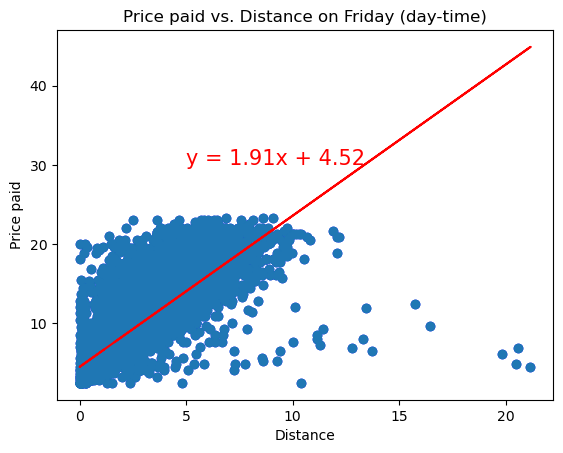

In [19]:
# Scatter plot of price paid vs. distance per trip
day = uber_df_filtered.set_index("key").between_time("6:00", "18:00")
day = day.loc[day["Day"] == "Friday"]
x_axis = day["distance"]
y_axis = day["fare_amount"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color="blue")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.scatter(x_axis, y_axis)
plt.ylabel('Price paid')
plt.xlabel('Distance')
plt.title("Price paid vs. Distance on Friday (day-time)")

correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Saving plot
plt.savefig("output_data/Fig4.png")

# Showing plot
plt.show()

The correlation between both factors is 0.82


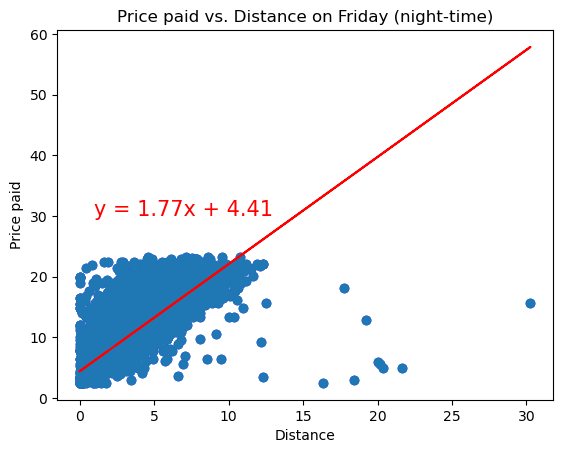

In [20]:
# Scatter plot of price paid vs. distance per trip
night = uber_df_filtered.set_index("key").between_time("18:00", "6:00")
night = night.loc[night["Day"] == "Friday"]
x_axis = night["distance"]
y_axis = night["fare_amount"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color="blue")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1,30),fontsize=15,color="red")
plt.scatter(x_axis, y_axis)
plt.ylabel('Price paid')
plt.xlabel('Distance')
plt.title("Price paid vs. Distance on Friday (night-time)")

correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Saving plot
plt.savefig("output_data/Fig3.png")

# Showing plot
plt.show()

In [21]:
# Table and graph for bins of hours on Friday
bins = [0, 6, 12, 18, 24]
labels = ['Early morning (00:00-05:59)', 'Morning (06:00-11:59)', 'Afternoon (12:00-17:59)', 'Night (18:00-23:59)']
bin_table = uber_df_filtered.loc[uber_df_filtered["Day"] == "Friday"]
bin_table['Time Bin'] = pd.cut(bin_table.key.dt.hour, bins, labels=labels, include_lowest=True, right=False)
bin_table.head()

# Creating serie
total_friday = bin_table.groupby(["Time Bin"])["key"].count()
average_price = bin_table.groupby(["Time Bin"])["fare_amount"].mean()
sum_price = bin_table.groupby(["Time Bin"])["fare_amount"].sum()
distance = bin_table.groupby(["Time Bin"])["distance"].mean()


#Creating a dictionary 
dictionary = {"# of Trips": total_friday, "Average price paid":average_price, "Average distance": distance, "Total paid": sum_price}

# Creating DataFrame
summary = pd.DataFrame(dictionary)
summary


C:\Users\oscar\AppData\Local\Temp\ipykernel_13864\1879377008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_table['Time Bin'] = pd.cut(bin_table.key.dt.hour, bins, labels=labels, include_lowest=True, right=False)


,# of Trips,Average price paid,Average distance,Total paid
Time Bin,,,,
Early morning (00:00-05:59),3227,9.544735,3.181464,30800.86
Morning (06:00-11:59),6915,8.917458,2.371541,61664.22
Afternoon (12:00-17:59),7310,8.924460,2.242865,65237.80
Night (18:00-23:59),9985,9.152087,2.599311,91383.59


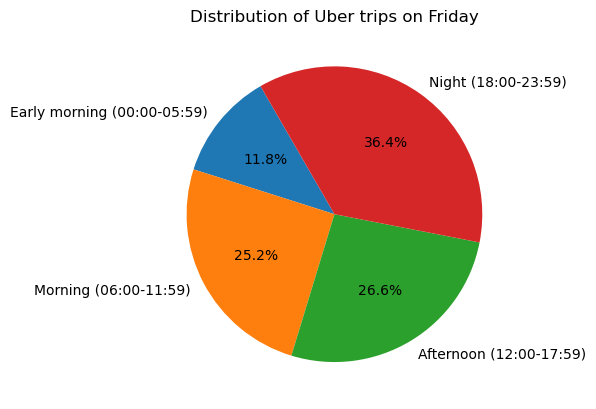

In [22]:
# Ploting pie chart with distribution of trips on Friday
summary_to_plot = summary.iloc[:,0]
summary_to_plot.plot(kind="pie", subplots=True, autopct="%1.1f%%", legend=False, startangle=120, ylabel="")
plt.title("Distribution of Uber trips on Friday")

# Saving plot
plt.savefig("output_data/Fig13.png")

# Showing plot
plt.show()

C:\Users\oscar\AppData\Local\Temp\ipykernel_13864\3194807346.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = uber_df_filtered.groupby(["year", "Type of day"]).mean()


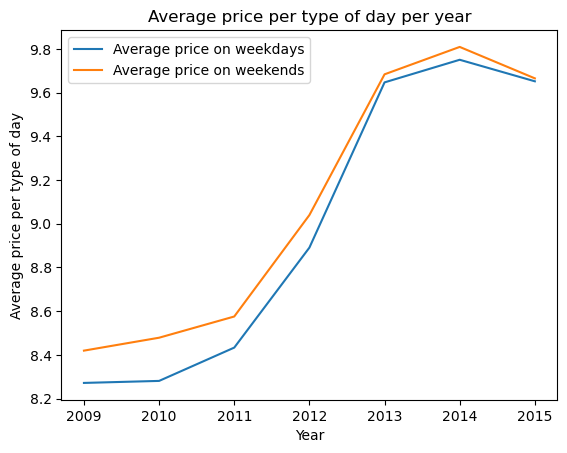

In [23]:
# Plotting average price on weekdays/weekends per year
group = uber_df_filtered.groupby(["year", "Type of day"]).mean()
day_df = pd.DataFrame(group)
day_df = day_df.iloc[:,1].reset_index().rename(columns={"fare_amount": "Average price", "year": "Year"})
year = day_df["Year"].unique()
weekday = day_df.loc[(day_df["Type of day"] == "Weekday")].iloc[:,[0,2]]
weekday = weekday.set_index("Year").rename(columns={"Average price": "Average price on weekdays"})
weekend = day_df.loc[(day_df["Type of day"] == "Weekend")].iloc[:,[0,2]]
weekend = weekend.set_index("Year").rename(columns={"Average price": "Average price on weekends"})

plot_data = weekday.join(weekend)
plot_data
plot = plot_data.plot(title="Average price per type of day per year")
plt.xlabel("Year")
plt.ylabel("Average price per type of day")

# Saving plot
plt.savefig("output_data/Fig10.png")

# Showing plot
plt.show()

In [24]:
# Filtering 2015
uber_2015 = uber_df_filtered.loc[(uber_df_filtered["date"] >= '2015-01-01') &
                                 (uber_df_filtered["date"] < '2016-01-01')].sort_values(by="date").reset_index(drop=True)

print(len(uber_2015))
uber_2015.head()

11903


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,date,year,month,season,Day,Type of day,Time
0,32298697,2015-01-01 21:06:35.000000400,9.5,2015-01-01 21:06:35 UTC,-73.978943,40.757992,-73.990463,40.751343,1,1.219940,2015-01-01,2015,1,Winter,Thursday,Weekday,21:06:35
1,36750137,2015-01-01 02:27:23.000000800,9.0,2015-01-01 02:27:23 UTC,-73.996796,40.716553,-73.988190,40.737694,1,2.460094,2015-01-01,2015,1,Winter,Thursday,Weekday,02:27:23
2,40175994,2015-01-01 14:48:07.000000110,9.0,2015-01-01 14:48:07 UTC,-73.985237,40.760406,-73.972412,40.780899,2,2.521656,2015-01-01,2015,1,Winter,Thursday,Weekday,14:48:07
3,18597506,2015-01-01 19:26:31.000000200,8.0,2015-01-01 19:26:31 UTC,-73.988922,40.744953,-73.982956,40.757305,3,1.462538,2015-01-01,2015,1,Winter,Thursday,Weekday,19:26:31
4,10382126,2015-01-01 19:12:51.000000800,9.5,2015-01-01 19:12:51 UTC,-73.973808,40.788887,-73.957298,40.770031,1,2.515678,2015-01-01,2015,1,Winter,Thursday,Weekday,19:12:51


In [50]:
latitude = 40.725639
longitude = -74.004097

# Set the parameters for the type of place
categories = "administrative.neighbourhood_level"
conditions = "vegetarian"
radius = 100

# Set the parameters for the type of search
filters = f"circle:{longitude},{latitude},{radius}"
bias = f"proximity:{longitude},{latitude}"
limit = 1

params = {
    "categories":categories,
    #"conditions":conditions,
    "limit":limit,
    "filter":filters,
    "bias":bias,
    "apiKey":geoapify_key    
}

base_url = "https://api.geoapify.com/v2/places"

response = requests.get(base_url, params=params).json()
print(response["features"][0]["properties"]["formatted"])
print(response["features"][0]["properties"]["district"])
print(json.dumps(response, indent=4, sort_keys=True))


Manhattan Community Board 2, Manhattan, New York, New York, United States of America
Manhattan Community Board 2
{
    "features": [
        {
            "geometry": {
                "coordinates": [
                    -74.00517103310358,
                    40.731140506743046
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "Manhattan Community Board 2",
                "address_line2": "Manhattan, New York, New York, United States of America",
                "categories": [
                    "administrative",
                    "administrative.neighbourhood_level"
                ],
                "city": "New York",
                "country": "United States",
                "country_code": "us",
                "county": "New York County",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Database Licence",


In [51]:
# Set the API base URL
url = "https://api.geoapify.com/v2/places"

# Define an empty list to fetch the weather data for each city
city_data = []
latitude = uber_2015["pickup_latitude"]
longitude = uber_2015["pickup_longitude"]

# Set the parameters for the type of place
categories = "administrative.neighbourhood_level"
radius = 100
limit = 1

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i in longitude.index:
    
    filters = f"circle:{longitude[i]},{latitude[i]},{radius}"
    bias = f"proximity:{longitude[i]},{latitude[i]}"
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    params = {
        "categories":categories,
        #"conditions":conditions,
        "limit":limit,
        "filter":filters,
        "bias":bias,
        "apiKey":geoapify_key    
    }
    
    response = requests.get(url, params=params).json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, latitude[i]))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        # Parse out suburb
        suburb = response["features"][0]["properties"]["district"]

        # Append the City information into city_data list
        city_data.append({"Suburb": suburb})

    # If an error is experienced, skip the city
    except:
        print("Coordinate not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | 40.75799179077149
Processing Record 2 of Set 1 | 40.716552734375
Processing Record 3 of Set 1 | 40.76040649414063
Processing Record 4 of Set 1 | 40.74495315551758
Processing Record 5 of Set 1 | 40.788887023925774
Processing Record 6 of Set 1 | 40.77922058105469
Processing Record 7 of Set 1 | 40.7589225769043
Processing Record 8 of Set 1 | 40.733699798583984
Processing Record 9 of Set 1 | 40.72760391235352
Processing Record 10 of Set 1 | 40.7588996887207
Processing Record 11 of Set 1 | 40.78256988525391
Processing Record 12 of Set 1 | 40.76510620117188
Processing Record 13 of Set 1 | 40.75994110107422
Processing Record 14 of Set 1 | 40.70568466186523
Processing Record 15 of Set 1 | 40.74961853027344
Processing Record 16 of Set 1 | 40.72463607788085
Processing Record 17 of Set 1 | 40.75741958618164
Processing Record 18 of Set 1 | 40.76028442382813
Processing Record 19 of Set 1 | 40.72452163696289
P

ReadTimeout: HTTPSConnectionPool(host='api.geoapify.com', port=443): Read timed out. (read timeout=None)

In [37]:
city_data_df = pd.DataFrame(city_data)
city_to_plot = uber_2015.join(city_data_df).dropna()
city_to_plot.head()

summ = city_to_plot.groupby("Suburb").count()
summ = summ.iloc[:,0]
summary_df = pd.DataFrame(summ).rename(columns={"Unnamed: 0": "Total"})
summary_df

,Total
Suburb,
Bronx County,2
Brooklyn,163
City of New York,2
Kings County,58
Manhattan,9176
Manhattan Community Board 12,12
Manhattan Community Board 3,724
Manhattan Community Board 6,1347
Manhattan Community Board 9,1


In [38]:
# Configure the map plot
map_plot_1 = city_to_plot.hvplot.points(
    "pickup_longitude",
    "pickup_latitude",
    geo = True,
    tiles = "OSM",
    scale = 1,
    hover_cols = ["Unnamed: 0"],
    #size = "passenger_count",
    frame_width = 1000,
    frame_height = 500,
    color = "Suburb"
)

# Display the map
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [pickup_longitude,pickup_latitude]   (Suburb,Unnamed: 0)